In [1]:
# https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner/notebook

#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme



In [2]:
# import train and test CSV files
train = pd.read_csv("C:/Users/User/Desktop/Oxford_DPhil/Kaggle/Titanic/Titanic_data/train.csv")
test = pd.read_csv("C:/Users/User/Desktop/Oxford_DPhil/Kaggle/Titanic/Titanic_data/test.csv")

# take a look at the data
train.describe(include = "all")

PassengerId    Survived      Pclass  \
count    891.000000  891.000000  891.000000   
unique          NaN         NaN         NaN   
top             NaN         NaN         NaN   
freq            NaN         NaN         NaN   
mean     446.000000    0.383838    2.308642   
std      257.353842    0.486592    0.836071   
min        1.000000    0.000000    1.000000   
25%      223.500000    0.000000    2.000000   
50%      446.000000    0.000000    3.000000   
75%      668.500000    1.000000    3.000000   
max      891.000000    1.000000    3.000000   

                                                     Name   Sex         Age  \
count                                                 891   891  714.000000   
unique                                                891     2         NaN   
top     Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...  male         NaN   
freq                                                    1   577         NaN   
mean                                                  NaN   NaN   29.699118   
std                                                   NaN   NaN   14.526497   
min                                                   NaN   NaN    0.420000   
25%                                                   NaN   NaN   20.125000   
50%                                                   NaN   NaN   28.000000   
75%                                                   NaN   NaN   38.000000   
max                                                   NaN   NaN   80.000000   

             SibSp       Parch    Ticket        Fare        Cabin Embarked  
count   891.000000  891.000000       891  891.000000          204      889  
unique         NaN         NaN       681         NaN          147        3  
top            NaN         NaN  CA. 2343         NaN  C23 C25 C27        S  
freq           NaN         NaN         7         NaN            4      644  
mean      0.523008    0.381594       NaN   32.204208          NaN      NaN  
std       1.102743    0.806057       NaN   49.693429          NaN      NaN  
min       0.000000    0.000000       NaN    0.000000          NaN      NaN  
25%       0.000000    0.000000       NaN    7.910400          NaN      NaN  
50%       0.000000    0.000000       NaN   14.454200          NaN      NaN  
75%       1.000000    0.000000       NaN   31.000000          NaN      NaN  
max       8.000000    6.000000       NaN  512.329200          NaN      NaN

In [3]:
# get a list of the features withi the dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
#see a sample of the dataset to get an idea of the variables - to return a random
train.sample(3)

PassengerId  Survived  Pclass  \
656          657         0       3   
498          499         0       1   
644          645         1       3   

                                                Name     Sex    Age  SibSp  \
656                            Radeff, Mr. Alexander    male    NaN      0   
498  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.00      1   
644                           Baclini, Miss. Eugenie  female   0.75      2   

     Parch  Ticket      Fare    Cabin Embarked  
656      0  349223    7.8958      NaN        S  
498      2  113781  151.5500  C22 C26        S  
644      1    2666   19.2583      NaN        C

train.drop(columns = ['Age', 'Name'])

train.loc[0]

train.loc[[0]]

train.loc[0, 'Age']

train.loc[2:20, 'Survived']

In [5]:
# chekc for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


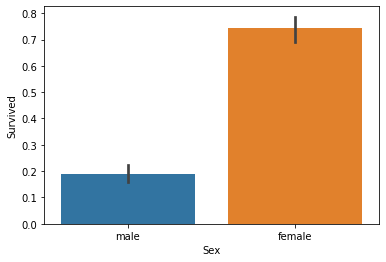

In [6]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

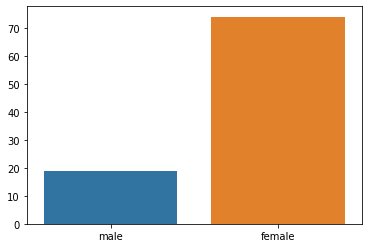

In [7]:


x = ["male", "female"]
y = [train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100, train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100]

sns.barplot(x,y)

In [8]:
male = train["Survived"][train["Sex"] == 'male']
print("sd of male survived: ", male.std())

female = train["Survived"][train["Sex"] == 'female']
print("sd of female survived: ", female.std())

sd of male survived:  0.39177527778591387
sd of female survived:  0.43821120391621965


In [9]:
print(train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

18.890814558058924


print(train["Survived"])

print(train["Survived"][train["Sex"] == 'male'][train["Age"] == 38.0])

In [10]:
print(train["Survived"][train["Sex"] == 'male'])

0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64


train["Survived"][train["Sex"] == 'male'][train["Survived"] == 1]

In [11]:
print(train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True))

0    0.811092
1    0.188908
Name: Survived, dtype: float64


Percentage of Pclass = 1 who survived:  62.96296296296296
Percentage of Pclass = 2 who survived:  47.28260869565217
Percentage of Pclass = 3 who survived:  24.236252545824847


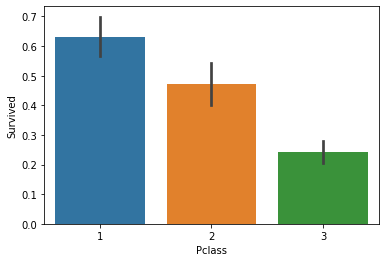

In [12]:
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
class_one = train['Survived'][train['Pclass'] == 1].value_counts(normalize = True)[1]*100
class_two = train['Survived'][train['Pclass'] == 2].value_counts(normalize = True)[1]*100
class_three = train['Survived'][train['Pclass'] == 3].value_counts(normalize = True)[1]*100

print("Percentage of Pclass = 1 who survived: ", class_one)
print("Percentage of Pclass = 2 who survived: ", class_two)
print("Percentage of Pclass = 3 who survived: ", class_three)

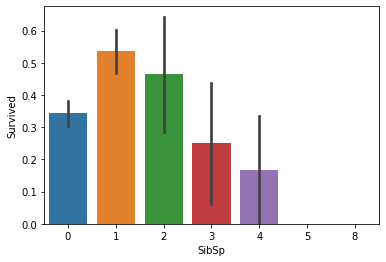

In [13]:
sns.barplot(x="SibSp", y="Survived", data=train)

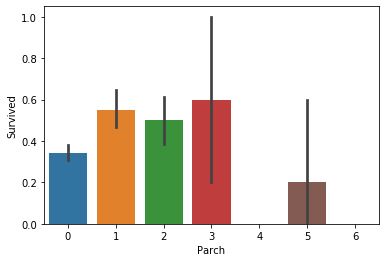

In [14]:
sns.barplot(x="Parch", y="Survived", data=train)

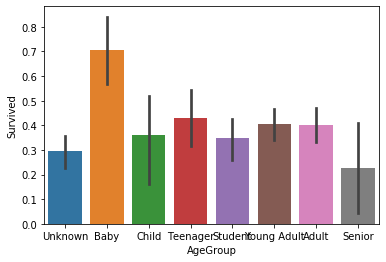

In [15]:
# sort the ages into lofical categories

# replace all the NaN elements with 0.5s
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] # np = numpy, inf numpy version infinity
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

# Bin values into discrete intervals.
# Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

train['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = labels)

#draw a bar plot of age vs survival
sns.barplot(x = "AgeGroup", y = "Survived", data = train)

% of CabinBool = True who survived
66.66666666666666
% of CabinBool = False who survived
29.985443959243085


[Text(0, 0, 'no cabin number'), Text(0, 0, 'yes cabin number')]

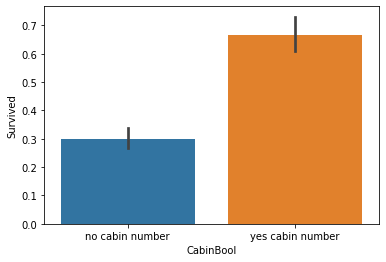

In [16]:
train["CabinBool"] = train["Cabin"].notnull().astype('int')
test["CabinBool"] = test["Cabin"].notnull().astype('int')

print("% of CabinBool = True who survived")
print(train["Survived"][train["CabinBool"] == True].value_counts(normalize = 1)[1]*100)

print("% of CabinBool = False who survived")
print(train["Survived"][train["CabinBool"] == False].value_counts(normalize = 1)[1]*100)

plot = sns.barplot(x = "CabinBool", y = "Survived", data=train)
plot.set_xticklabels(["no cabin number", "yes cabin number"])

In [17]:
# cleaning data
test.describe(include = 'all')

PassengerId      Pclass                         Name   Sex  \
count    418.000000  418.000000                          418   418   
unique          NaN         NaN                          418     2   
top             NaN         NaN  Warren, Mr. Charles William  male   
freq            NaN         NaN                            1   266   
mean    1100.500000    2.265550                          NaN   NaN   
std      120.810458    0.841838                          NaN   NaN   
min      892.000000    1.000000                          NaN   NaN   
25%      996.250000    1.000000                          NaN   NaN   
50%     1100.500000    3.000000                          NaN   NaN   
75%     1204.750000    3.000000                          NaN   NaN   
max     1309.000000    3.000000                          NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare  \
count   418.000000  418.000000  418.000000       418  417.000000   
unique         NaN         NaN         NaN       363         NaN   
top            NaN         NaN         NaN  PC 17608         NaN   
freq           NaN         NaN         NaN         5         NaN   
mean     23.941388    0.447368    0.392344       NaN   35.627188   
std      17.741080    0.896760    0.981429       NaN   55.907576   
min      -0.500000    0.000000    0.000000       NaN    0.000000   
25%       9.000000    0.000000    0.000000       NaN    7.895800   
50%      24.000000    0.000000    0.000000       NaN   14.454200   
75%      35.750000    1.000000    0.000000       NaN   31.500000   
max      76.000000    8.000000    9.000000       NaN  512.329200   

                  Cabin Embarked     AgeGroup   CabinBool  
count                91      418          418  418.000000  
unique               76        3            8         NaN  
top     B57 B59 B63 B66        S  Young Adult         NaN  
freq                  3      270           96         NaN  
mean                NaN      NaN          NaN    0.217703  
std                 NaN      NaN          NaN    0.413179  
min                 NaN      NaN          NaN    0.000000  
25%                 NaN      NaN          NaN    0.000000  
50%                 NaN      NaN          NaN    0.000000  
75%                 NaN      NaN          NaN    0.000000  
max                 NaN      NaN          NaN    1.000000

In [18]:
# drop feature for dropping specific labels from rows or columns (axis 1 represents columns, axis 0 represents index)
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [19]:
#fill in the mssing values in the Embarked feature
# shape[0] = give number of row count
# shape[1] = give number of column count

print("Number of people embarking in Southampton (S)")
southampton = train[train['Embarked'] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C)")
cherbourg = train[train['Embarked'] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Southampton (Queenstown )")
queenstown = train[train['Embarked'] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S)
644
Number of people embarking in Cherbourg (C)
168
Number of people embarking in Southampton (Queenstown )
77


In [20]:
# most people embarked in S, fill the rest in S
train = train.fillna({'Embarked': "S"})

In [21]:
# predict the missing age
#combine group of both dataset
combine = [train, test]

#extract a title for each Name
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([a-zA-Z]+)[\.]', expand = False)

pd.crosstab(train['Title'], train['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [22]:
# replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.285714
5   Royal  1.000000

In [23]:
# map each of the title groups to a numerical value

title_mapping = {'Mr': 1, 'Miss':2, 'Mrs': 3, 'Master': 4, 'Royal': 5, 'Rare': 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch     Fare Embarked     AgeGroup  CabinBool  Title  
0      0   7.2500        S      Student          0      1  
1      0  71.2833        C        Adult          1      3  
2      0   7.9250        S  Young Adult          0      2

In [24]:
test["AgeGroup"][3]

'Young Adult'

In [53]:
test

PassengerId  Pclass  Sex  SibSp  Parch  Embarked  AgeGroup  CabinBool  \
0            892       3    0      0      0         3       5.0          0   
1            893       3    1      1      0         1       6.0          0   
2            894       2    0      0      0         3       7.0          0   
3            895       3    0      0      0         1       5.0          0   
4            896       3    1      1      1         1       4.0          0   
..           ...     ...  ...    ...    ...       ...       ...        ...   
413         1305       3    0      0      0         1       5.0          0   
414         1306       1    1      0      0         2       6.0          1   
415         1307       3    0      0      0         1       6.0          0   
416         1308       3    0      0      0         1       5.0          0   
417         1309       3    0      1      1         2       1.0          0   

     Title FareBand  
0        1        1  
1        3        1  
2        1        2  
3        1        2  
4        3        2  
..     ...      ...  
413      1        2  
414      6        4  
415      1        1  
416      1        2  
417      4        3  

[418 rows x 10 columns]

In [25]:
test.loc[0]

PassengerId                 892
Pclass                        3
Name           Kelly, Mr. James
Sex                        male
Age                        34.5
SibSp                         0
Parch                         0
Fare                     7.8292
Embarked                      Q
AgeGroup            Young Adult
CabinBool                     0
Title                         1
Name: 0, dtype: object

In [26]:
test.loc[[0]]

PassengerId  Pclass              Name   Sex   Age  SibSp  Parch    Fare  \
0          892       3  Kelly, Mr. James  male  34.5      0      0  7.8292   

  Embarked     AgeGroup  CabinBool  Title  
0        Q  Young Adult          0      1

In [27]:
test["AgeGroup"][:3]

0    Young Adult
1          Adult
2         Senior
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [28]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [29]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [30]:
test_null = pd.isnull(test).sum()
test_null.loc

In [31]:
# drop the name as we have extracted the title
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [32]:
# map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare Embarked  \
0            1         0       3    0      1      0   7.2500        S   
1            2         1       1    1      1      0  71.2833        C   
2            3         1       3    1      0      0   7.9250        S   
3            4         1       1    1      1      0  53.1000        S   
4            5         0       3    0      0      0   8.0500        S   

   AgeGroup  CabinBool  Title  
0       4.0          0      1  
1       6.0          1      3  
2       5.0          0      2  
3       5.0          1      3  
4       5.0          0      1

In [33]:
# map each Embarked value to a numerical
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare  Embarked  \
0            1         0       3    0      1      0   7.2500         1   
1            2         1       1    1      1      0  71.2833         2   
2            3         1       3    1      0      0   7.9250         1   
3            4         1       1    1      1      0  53.1000         1   
4            5         0       3    0      0      0   8.0500         1   

   AgeGroup  CabinBool  Title  
0       4.0          0      1  
1       6.0          1      3  
2       5.0          0      2  
3       5.0          1      3  
4       5.0          0      1

In [34]:
print(pd.isnull(test).sum())

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           1
Embarked       0
AgeGroup       0
CabinBool      0
Title          0
dtype: int64


In [35]:
for x in range(len(test['Fare'])):
    if pd.isnull(test['Fare'][x]):
        print(x)

152


In [36]:
# fill in missing Fare value in test set based on mean fare for that Pclass
# find the pclass the missing value person
for x in range(len(test['Fare'])):
    if pd.isnull(test['Fare'][x]):
        pclass = test['Pclass'][x]

pclass

3

In [37]:
# put the Fare value into the unknown value
for x in range(len(test['Fare'])):
    if pd.isnull(test['Fare'][x]):
        pclass = test['Pclass'][x] # Pclass = 3
        test['Fare'][x] = round(train[train['Pclass'] == pclass]['Fare'].mean(), 4)
test['Fare'][152]

13.6756

In [38]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [39]:
# # different between qcut and cut
# The major distinction is that qcut will calculate the size of each bin in order to make sure the distribution of data in the bins is equal. In other words, all bins will have (roughly) the same number of observations but the bin range will vary.

# On the other hand, cut is used to specifically define the bin edges. There is no guarantee about the distribution of items in each bin. In fact, you can define bins in such a way that no items are included in a bin or nearly all items are in a single bin.

# map Fare value into FareBand of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

# drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

train.head()

PassengerId  Survived  Pclass  Sex  SibSp  Parch  Embarked  AgeGroup  \
0            1         0       3    0      1      0         1       4.0   
1            2         1       1    1      1      0         2       6.0   
2            3         1       3    1      0      0         1       5.0   
3            4         1       1    1      1      0         1       5.0   
4            5         0       3    0      0      0         1       5.0   

   CabinBool  Title FareBand  
0          0      1        1  
1          1      3        4  
2          0      2        2  
3          1      3        4  
4          0      1        2

In [40]:
x_val

NameError: name 'x_val' is not defined

In [41]:
# machine learning
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [42]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train) # put the parameter (x_train) & result (y_train)
y_pred = gaussian.predict(x_val) # use the trained data and predict the test parameters
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

78.68
79.19
82.74
78.68
78.68
80.2
82.74
77.66
75.13
84.77


In [43]:
model_score = {
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]}

models = pd.DataFrame(model_score)
models.sort_values(by = 'Score', ascending = False)

Model  Score
9  Gradient Boosting Classifier  84.77
0       Support Vector Machines  82.74
3                 Random Forest  82.74
7                 Decision Tree  80.20
2           Logistic Regression  79.19
4                   Naive Bayes  78.68
5                    Perceptron  78.68
6                    Linear SVC  78.68
1                           KNN  77.66
8   Stochastic Gradient Descent  75.13

In [44]:
# set ids as Passenger ID and predict survival
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [45]:
df = {'PassengerId': ids, 'Survived': predictions}
output = pd.DataFrame (df)
output

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]